In [26]:
# Import the Qiskit SDK
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer
from qiskit.tools.visualization import plot_histogram
# from utils import print_dict

In [27]:
# Numbers of qubits that will be used in the circuit
numbers_of_qubits = 4

# Create a Quantum Register with n qubits.
q = QuantumRegister(numbers_of_qubits)

# Create a Classical Register with n bits.
c = ClassicalRegister(numbers_of_qubits)

# Create a Quantum Circuit
qc = QuantumCircuit(q, c)

# Add a H gate on qubit 2 and 1, putting qubits work in superposition
# qc.h(q[4])
qc.h(q[3])
qc.h(q[2])
qc.h(q[1])

# Add divider gate on qubit 0

# qwd gate to n_qbits=3, m_marked_itens=1
qc.u3(1.2309594173407747, 2.220446049250313e-16, 3.141592653589793, q[0])

# qwd gate to n_qbits=4, m_marked_itens=3
# qc.u3(0.9272952180016123, 2.220446049250313e-16, 3.141592653589793, q[0])

# Applying oracle
# 2 qubits
# qc.cz(q[1], q[0])

# 3 qubits
qc.h(q[0])
qc.ccx(q[2], q[1], q[0])
qc.h(q[0])


# Applying controlled_u_1
qc.z(q[0])

# Add combiner gate on qubit 0

# qwc gate to n_qbits=3, m_marked_itens=1
qc.u3(1.2309594173407747, 2.220446049250313e-16, 3.141592653589793, q[0])

# qwc gate to n_qbits=4, m_marked_itens=3
# qc.u3(0.9272952180016123, 2.220446049250313e-16, 3.141592653589793, q[0])

# Add a Measure gate to see the state.
qc.measure(q, c)

In [28]:
# See a list of available local simulators
# print("Aer backends: ", Aer.backends())

# Compile and run the Quantum circuit on a simulator backend
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend_sim)
result_sim = job_sim.result()

Simulation status:  COMPLETED
get_counts
{'0001': 97, '0110': 126, '1010': 16, '0100': 17, '0101': 133, '0010': 18, '1000': 16, '1110': 124, '1100': 13, '1101': 114, '0011': 107, '1011': 120, '0000': 13, '1001': 110}


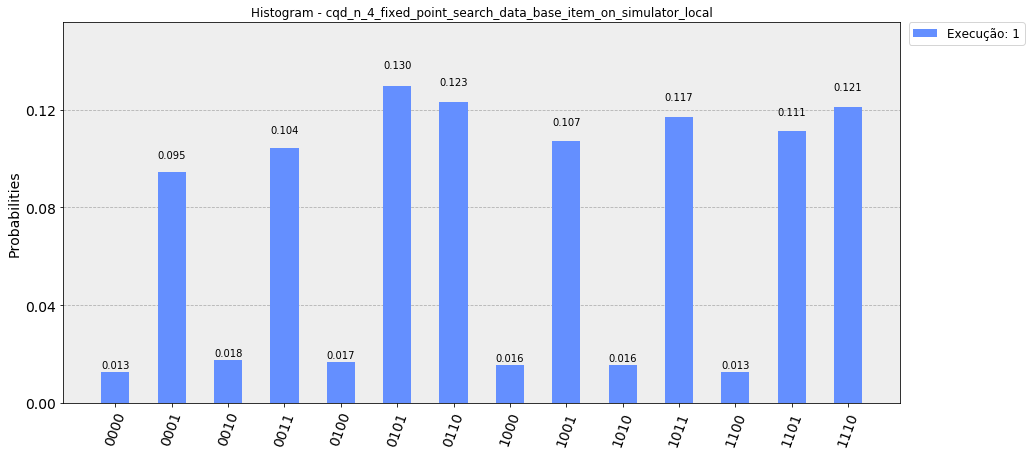

In [29]:
# Show the results
print("Simulation status: ", result_sim.status)
# print(result_sim.get_counts(qc))
print("get_counts")
print(result_sim.get_counts())
# print_dict(result_sim.get_counts())

# Plot graph
plot_histogram(
    data=result_sim.get_counts(), 
    title='Histogram - cqd_n_4_fixed_point_search_data_base_item_on_simulator_local', 
    legend=['Execução: 1'], 
    figsize=(15,7), 
    bar_labels=True
)
